#                                           EDA 1

In [2]:
from google.colab import files


uploaded = files.upload()

Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
df = pd.read_csv('BIKE DETAILS.csv')
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [5]:
#1. What is the range of selling prices in the dataset?
range_selling_price = df['selling_price'].max() - df['selling_price'].min()
print("Range of selling prices:", range_selling_price)

Range of selling prices: 755000


In [6]:
# 2. What is the median selling price for bikes in the dataset?
median_selling_price = df['selling_price'].median()
print("Median selling price:", median_selling_price)

Median selling price: 45000.0


In [7]:
# 3. What is the most common seller type?
most_common_seller_type = df['seller_type'].mode()[0]
print("Most common seller type:", most_common_seller_type)

Most common seller type: Individual


In [8]:
# 4. How many bikes have driven more than 50,000 kilometers?
bikes_over_50000_km = (df['km_driven'] > 50000).sum()
print("Number of bikes driven more than 50,000 kilometers:", bikes_over_50000_km)

Number of bikes driven more than 50,000 kilometers: 170


In [9]:
# 5. What is the average km_driven value for each ownership type?
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print("Average km_driven by ownership type:")
print(avg_km_by_owner)

Average km_driven by ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [10]:
# 6. What proportion of bikes are from the year 2015 or older?
proportion_2015_or_older = (df['year'] <= 2015).mean()
print("Proportion of bikes from the year 2015 or older:", proportion_2015_or_older*100,'%')


Proportion of bikes from the year 2015 or older: 56.64467483506126 %


In [11]:
# 7. What is the trend of missing values across the dataset?
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [12]:
# 8. What is the highest ex_showroom_price recorded, and for which bike?
max_ex_showroom = df['ex_showroom_price'].max()
bike_with_max_ex_showroom = df.loc[df['ex_showroom_price'] == max_ex_showroom, 'name'].values
print("Highest ex_showroom_price recorded:", max_ex_showroom)
print("Bike with highest ex_showroom_price:", bike_with_max_ex_showroom)

Highest ex_showroom_price recorded: 1278000.0
Bike with highest ex_showroom_price: ['Harley-Davidson Street Bob']


In [13]:
# 9. What is the total number of bikes listed by each seller type?
seller_type_counts = df['seller_type'].value_counts()
print("Total number of bikes listed by each seller type:")
print(seller_type_counts)

Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

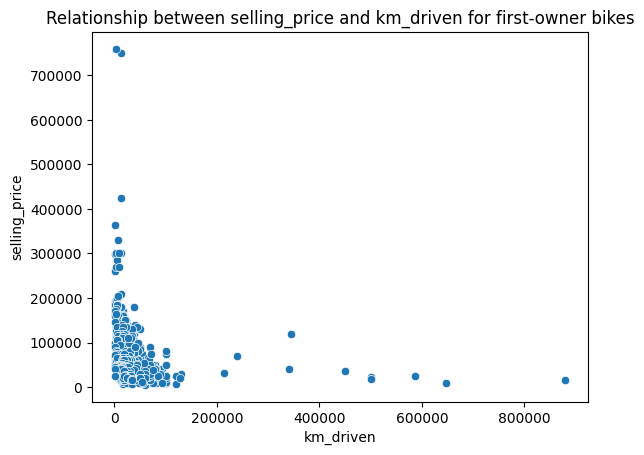

In [15]:
# 10. What is the relationship between selling_price and km_driven for first-owner bikes?
sns.scatterplot(data=df, x='km_driven', y='selling_price')
plt.title('Relationship between selling_price and km_driven for first-owner bikes')
plt.show()

In [16]:
# 11. Identify and remove outliers in the km_driven column using the IQR method.
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[~((df['km_driven'] < (Q1 - 1.5 * IQR)) | (df['km_driven'] > (Q3 + 1.5 * IQR)))]
print("Number of outliers removed:", len(df) - len(filtered_df))

Number of outliers removed: 39


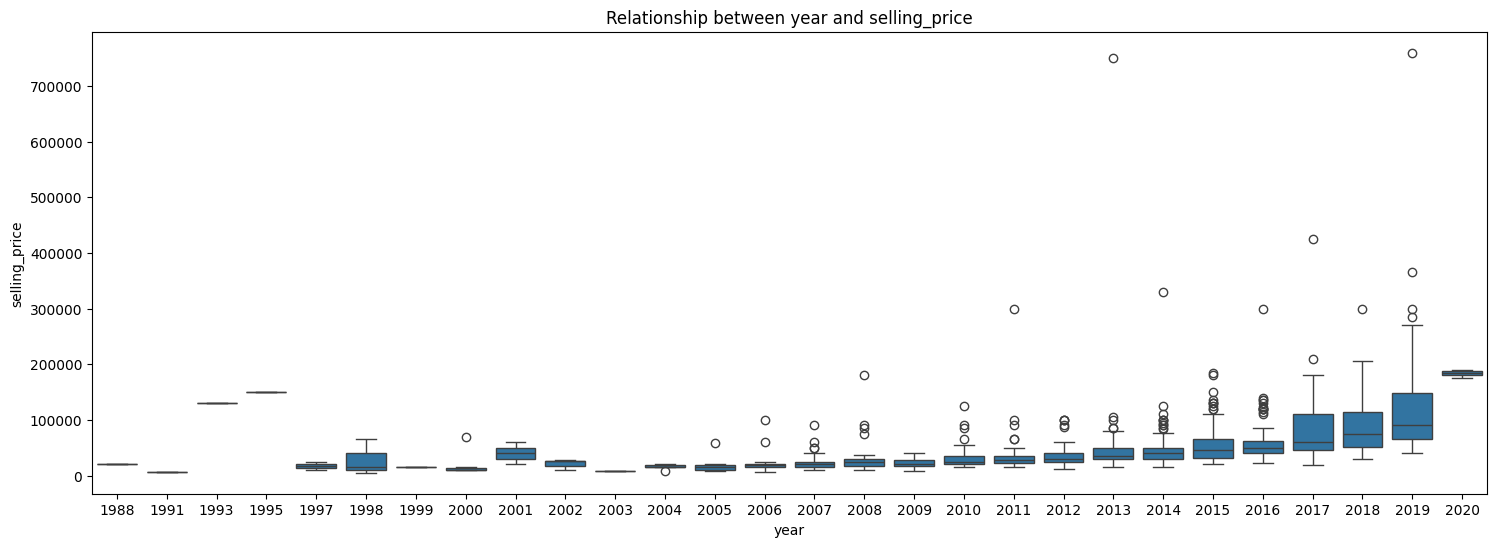

In [17]:
# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price.
plt.figure(figsize=(18,6))
sns.boxplot(data=df, x='year', y='selling_price')
plt.title('Relationship between year and selling_price')
plt.show()

In [18]:
# 13. What is the average depreciation in selling price based on the bike's age (2025 - year)?
df['age'] = 2025 - df['year']
avg_depreciation_by_age = df.groupby('age')['selling_price'].mean()
print("Average depreciation in selling price based on bike age:")
print(avg_depreciation_by_age)

Average depreciation in selling price based on bike age:
age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


In [19]:
# 14. Which bike names are priced significantly above the average price for their manufacturing year?
yearly_avg = df.groupby('year')['selling_price'].mean().reset_index()
merged = df.merge(yearly_avg, on='year', suffixes=('', '_year_avg'))
outliers_by_price = merged[merged['selling_price'] > (merged['selling_price_year_avg'] * 1.5)]
print("Bike names priced significantly above the average price:")
print(outliers_by_price['name'])

Bike names priced significantly above the average price:
2       Royal Enfield Classic Gunmetal Grey
7      Royal Enfield Bullet 350 [2007-2011]
13                            Yamaha YZF R3
18      Royal Enfield Classic Gunmetal Grey
23                            Jawa Standard
                       ...                 
979               Royal Enfield Thunder 500
981               Royal Enfield Thunder 350
983               Royal Enfield Classic 350
984               Royal Enfield Classic 500
985               Royal Enfield Classic 500
Name: name, Length: 157, dtype: object


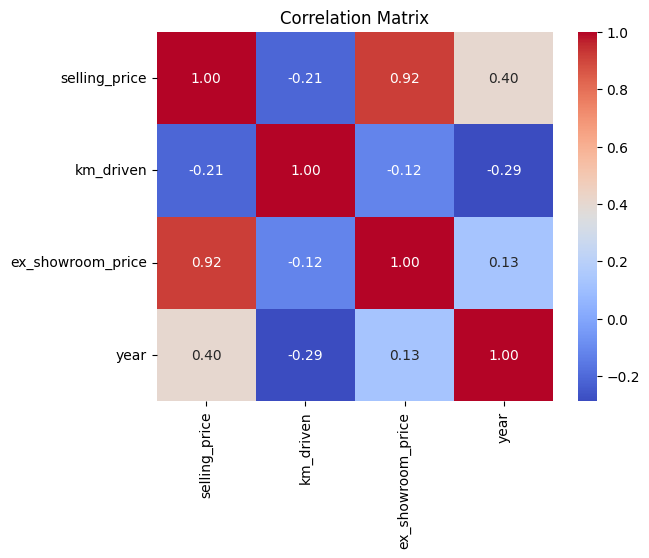

In [20]:
# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.
correlation_matrix = df[['selling_price', 'km_driven', 'ex_showroom_price', 'year']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#EDA 2

In [22]:
from google.colab import files
uploaded = files.upload()


Saving Car Sale.csv to Car Sale.csv


In [23]:
import pandas as pd
car_df = pd.read_csv('Car Sale.csv')
car_df.head()


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [24]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [25]:
# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
avg_price_by_dealer = car_df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print("Average selling price of cars for each dealer:")
print(avg_price_by_dealer)

Average selling price of cars for each dealer:
Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                           

In [26]:
# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about pricing trends?
price_std_by_company = car_df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("Car Brand has the highest Variation in Prices")
print(price_std_by_company)

Car Brand has the highest Variation in Prices
Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


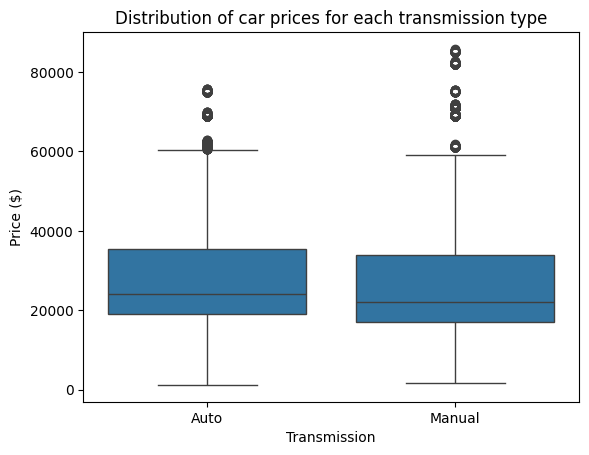

In [27]:
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
sns.boxplot(data=car_df, x='Transmission', y='Price ($)')
plt.title('Distribution of car prices for each transmission type')
plt.show()

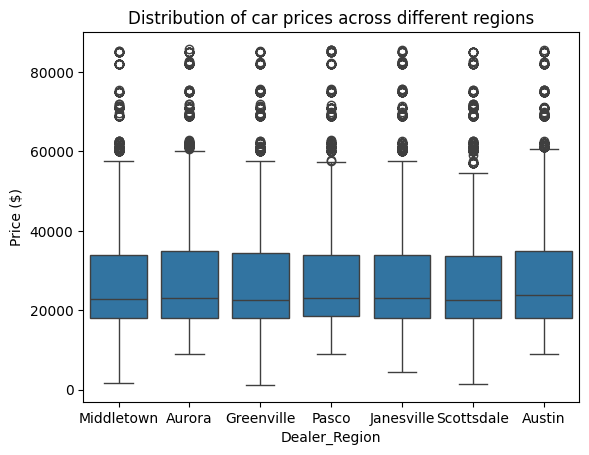

In [28]:
# 4. What is the distribution of car prices across different regions?
sns.boxplot(data=car_df, x='Dealer_Region', y='Price ($)')
plt.title('Distribution of car prices across different regions')
plt.show()

In [29]:
# 5. What is the distribution of cars based on body styles?
body_style_distribution = car_df['Body Style'].value_counts()
print("Distribution of cars based on body styles:")
print(body_style_distribution)

Distribution of cars based on body styles:
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


In [30]:
# 6. How does the average selling price of cars vary by customer gender and annual income?
avg_price_by_gender_income = car_df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean()
print("Average selling price of cars by customer gender and annual income:")
print(avg_price_by_gender_income)

Average selling price of cars by customer gender and annual income:
Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64


In [31]:
# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
region_price_distribution = car_df.groupby('Dealer_Region')['Price ($)'].describe()
cars_sold_by_region = car_df['Dealer_Region'].value_counts()
print("Distribution of car prices by region:")
print(region_price_distribution)
print("Number of cars sold by region:")
print(cars_sold_by_region)


Distribution of car prices by region:
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco       

In [32]:

# 8. How does the average car price differ between cars with different engine sizes?
avg_price_by_engine = car_df.groupby('Engine')['Price ($)'].mean()
print("Average car price by engine size:")
print(avg_price_by_engine)

Average car price by engine size:
Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


In [33]:

car_df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [34]:
# 9. How do car prices vary based on the customer’s annual income bracket?
car_df['income_bracket'] = pd.cut(car_df['Annual Income'], bins=[0, 50000, 100000, 500000, 1000000, np.inf],
                                  labels=['<50K', '50K-100K', '100K-500K', '500K-1M', '1M+'])
avg_price_by_income_bracket = car_df.groupby('Annual Income')['Price ($)'].mean()
print("Average car price by income bracket:")
print(avg_price_by_income_bracket)


Average car price by income bracket:
Annual Income
10080       22801.000000
13500       27878.981415
24000       61001.000000
85000       43000.000000
106000      46001.000000
                ...     
6600000     39000.000000
6800000     15000.000000
7650000     21000.000000
8000000     85000.000000
11200000    26001.000000
Name: Price ($), Length: 2508, dtype: float64


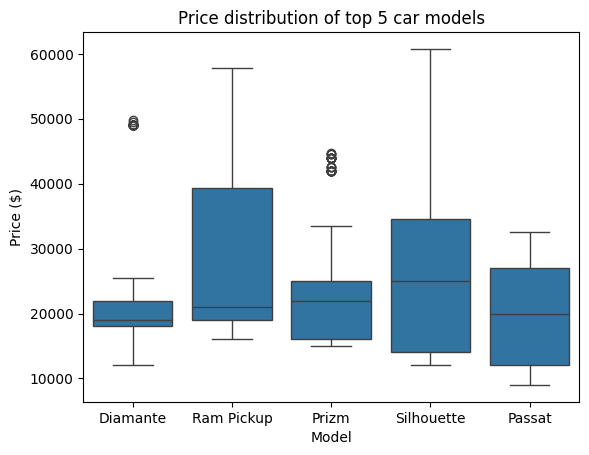

In [35]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_5_models = car_df['Model'].value_counts().head(5).index
sns.boxplot(data=car_df[car_df['Model'].isin(top_5_models)], x='Model', y='Price ($)')
plt.title('Price distribution of top 5 car models')
plt.show()

In [36]:
# 11.  How does car price vary with engine size across different car colors, and which colors have the highest price variation
price_by_color_engine = car_df.groupby(['Color', 'Engine'])['Price ($)'].mean().unstack()
price_std_by_color = car_df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("Car price varies with engine size across different car colors:")
print(price_by_color_engine)
print("Colors with the highest price variation:")
print(price_std_by_color)

Car price varies with engine size across different car colors:
Engine      DoubleÂ Overhead Camshaft  Overhead Camshaft
Color                                                   
Black                    25766.451103       31732.967164
Pale White               30347.987460       24327.767694
Red                      27434.392314       30153.405229
Colors with the highest price variation:
Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [37]:
# 12. Is there any seasonal trend in car sales based on the date of sale?
car_df['Date'] = pd.to_datetime(car_df['Date'])
car_df['Month'] = car_df['Date'].dt.month
sales_by_month = car_df['Month'].value_counts().sort_index()
print("Seasonal trend in car sales based on the date of sale:")
print(sales_by_month)

Seasonal trend in car sales based on the date of sale:
Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: count, dtype: int64


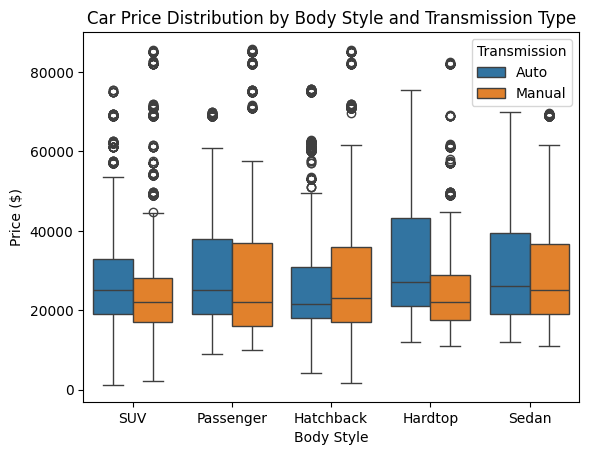

In [38]:
# 13. How does the car price distribution change when considering different combinations of body style and transmission type?
sns.boxplot(data=car_df, x='Body Style', y='Price ($)', hue = 'Transmission')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.show()


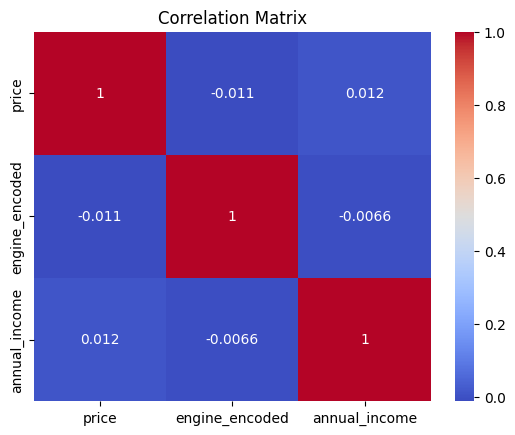

In [39]:
# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
engine_encoded = pd.factorize(car_df['Engine'])[0]
correlation_matrix = pd.DataFrame({
    'price': car_df['Price ($)'],
    'engine_encoded': engine_encoded,
    'annual_income': car_df['Annual Income']
}).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [40]:
# 15. How does the average car price vary across different car models and engine types?
avg_price_model_engine = car_df.groupby(['Model', 'Engine'])['Price ($)'].mean().sort_values(ascending=False)
print("Average car price by model and engine type:")
print(avg_price_model_engine)


Average car price by model and engine type:
Model     Engine                   
SC        Overhead Camshaft            61074.818182
Ranger    DoubleÂ Overhead Camshaft    61064.055556
Sable     Overhead Camshaft            61039.770833
Catera    DoubleÂ Overhead Camshaft    56836.933333
LX470     Overhead Camshaft            54037.490196
                                           ...     
A4        Overhead Camshaft            12046.220000
Taurus    DoubleÂ Overhead Camshaft    11665.538462
Escort    Overhead Camshaft            11403.866667
Intrepid  Overhead Camshaft            11069.882353
Mirage    DoubleÂ Overhead Camshaft     9063.368421
Name: Price ($), Length: 261, dtype: float64


#EDA 3

In [41]:
from google.colab import files


uploaded = files.upload()

Saving amazon.csv to amazon.csv


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("amazon.csv")

In [43]:
# Data Cleaning
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(',', ''), errors='coerce')
df['main_category'] = df['category'].str.split('|').str[0]

In [44]:
# 1. What is the average rating for each product category?
print("\n1. What is the average rating for each product category?")
print(df.groupby('main_category')['rating'].mean().sort_values(ascending=False))


1. What is the average rating for each product category?
main_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Home&Kitchen             4.040716
Health&PersonalCare      4.000000
MusicalInstruments       3.900000
Car&Motorbike            3.800000
Name: rating, dtype: float64


In [45]:
# 2. What are the top rating_count products by category?
print("\n2. What are the top rating_count products by category?")
top_rating_products = df.loc[df.groupby('main_category')['rating_count'].idxmax()]
print(top_rating_products[['main_category', 'product_name', 'rating_count']])


2. What are the top rating_count products by category?
              main_category  \
1157          Car&Motorbike   
588   Computers&Accessories   
12              Electronics   
1247    Health&PersonalCare   
1028           Home&Kitchen   
982         HomeImprovement   
613      MusicalInstruments   
659          OfficeProducts   
924              Toys&Games   

                                           product_name  rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1118.0  
588           SanDisk Cruzer Blade 32GB USB Flash Drive      253105.0  
12    AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0  
1247  Dr Trust Electronic Kitchen Digital Scale Weig...        3663.0  
1028  Pigeon Polypropylene Mini Handy and Compact Ch...      270563.0  
982   Gizga Essentials Cable Organiser, Cord Managem...        5985.0  
613   Boya ByM1 Auxiliary Omnidirectional Lavalier C...       68664.0  
659   Casio FX-82MS 2nd Gen Non-Programmable Scienti...  


3. What is the distribution of discounted prices vs. actual prices?


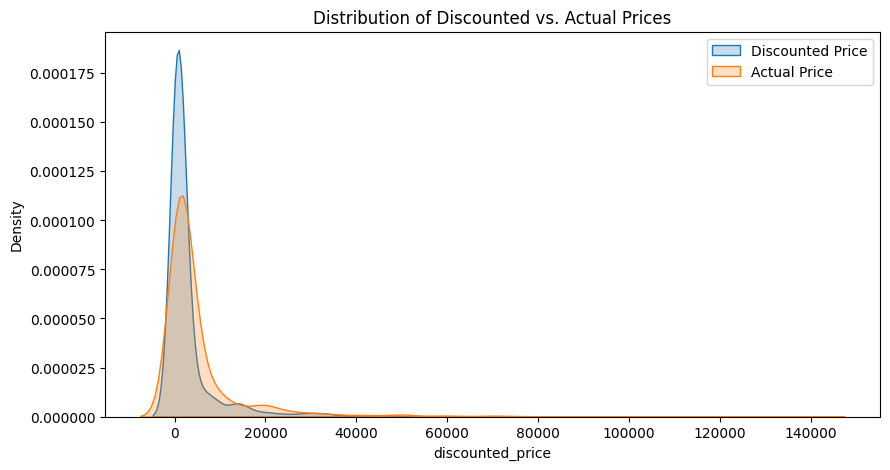

In [46]:
# 3. What is the distribution of discounted prices vs. actual prices?
print("\n3. What is the distribution of discounted prices vs. actual prices?")
plt.figure(figsize=(10,5))
sns.kdeplot(df['discounted_price'], label='Discounted Price', fill=True)
sns.kdeplot(df['actual_price'], label='Actual Price', fill=True)
plt.title('Distribution of Discounted vs. Actual Prices')
plt.legend()
plt.show()

In [47]:
# 4. How does the average discount percentage vary across categories?
print("\n4. How does the average discount percentage vary across categories?")
discount_by_category = df.groupby('main_category')['discount_percentage'].mean().sort_values(ascending=False)
print(discount_by_category)


4. How does the average discount percentage vary across categories?
main_category
HomeImprovement          57.500000
Computers&Accessories    54.024283
Health&PersonalCare      53.000000
Electronics              50.828897
MusicalInstruments       46.000000
Car&Motorbike            42.000000
Home&Kitchen             40.120536
OfficeProducts           12.354839
Toys&Games                0.000000
Name: discount_percentage, dtype: float64


In [48]:
# 5. What are the most popular product names?
print("\n5. What are the most popular product names?")
popular_names = df.sort_values(by='rating_count', ascending=False)[['product_name', 'rating_count']].head(10)
print(popular_names)


5. What are the most popular product names?
                                          product_name  rating_count
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...      426973.0
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      426973.0
12   AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0
684  AmazonBasics Flexible Premium HDMI Cable (Blac...      426972.0
400  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
352  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
584  boAt BassHeads 100 in-Ear Wired Headphones wit...      363711.0
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...      313836.0
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...      313836.0
566  Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...      313832.0


In [49]:
# 6. What are the most popular product keywords?
print("\n6. What are the most popular product keywords?")
from collections import Counter
import re

all_keywords = df['product_name'].dropna().apply(lambda x: re.findall(r'\b\w+\b', x.lower()))
flat_keywords = [word for sublist in all_keywords for word in sublist]
keyword_counts = Counter(flat_keywords)
print(keyword_counts.most_common(10))


6. What are the most popular product keywords?
[('with', 752), ('for', 674), ('black', 530), ('usb', 417), ('cable', 414), ('1', 413), ('and', 331), ('c', 289), ('3', 275), ('2', 267)]


In [50]:
# 7. What are the most popular product reviews?
print("\n7. What are the most popular product reviews?")
popular_reviews = df.loc[df['rating_count'].nlargest(5).index][['product_name', 'review_content']]
print(popular_reviews)


7. What are the most popular product reviews?
                                          product_name  \
12   AmazonBasics Flexible Premium HDMI Cable (Blac...   
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...   
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...   
684  AmazonBasics Flexible Premium HDMI Cable (Blac...   
352  boAt Bassheads 100 in Ear Wired Earphones with...   

                                        review_content  
12   I am using it for 14 days now. The experience ...  
47   I am using it for 14 days now. The experience ...  
65   I am using it for 14 days now. The experience ...  
684  I am using it for 14 days now. The experience ...  
352  The sound quality of this earphone are really ...  


In [51]:
# 8. What is the correlation between discounted_price and rating?
print("\n8. What is the correlation between discounted_price and rating?")
correlation = df['discounted_price'].corr(df['rating'])
print(f"Correlation: {correlation:.2f}")


8. What is the correlation between discounted_price and rating?
Correlation: 0.12


In [52]:
# 9. What are the Top 5 categories based on the highest ratings?
print("\n9. What are the Top 5 categories based on the highest ratings?")
top_categories = df.groupby('main_category')['rating'].mean().sort_values(ascending=False).head(5)
print(top_categories)


9. What are the Top 5 categories based on the highest ratings?
main_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Name: rating, dtype: float64


In [53]:
# 10. Identify any potential areas for improvement or optimization based on the data analysis.
print("\n10. Identify any potential areas for improvement or optimization based on the data analysis.")
print("""
- Some categories have low average ratings – investigate product quality or descriptions.
- Large discounts don't always correlate with high ratings – reassess pricing strategy.
- Focus marketing on products with high ratings but low visibility.
- Improve SEO on frequently used keywords in product titles.
- Consider customer feedback on low-rated high-discount products for improvements.
""")


10. Identify any potential areas for improvement or optimization based on the data analysis.

- Some categories have low average ratings – investigate product quality or descriptions.
- Large discounts don't always correlate with high ratings – reassess pricing strategy.
- Focus marketing on products with high ratings but low visibility.
- Improve SEO on frequently used keywords in product titles.
- Consider customer feedback on low-rated high-discount products for improvements.



#EDA 4

In [54]:
from google.colab import files


uploaded = files.upload()


Saving spotify.csv to spotify.csv


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("spotify.csv")


In [57]:
# 1. Read the dataframe, check null value if present then do the needful, check duplicate row, if present then do the needful
print("\n1. Read the dataframe, check null value if present then do the needful, check duplicate row, if present then do the needful")

print("\nNull Values Before Handling:")
print(df.isnull().sum())

# Drop rows with any null values
df.dropna(inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

print("\nNull Values After Handling:")
print(df.isnull().sum())
print("\nShape after removing nulls and duplicates:", df.shape)


1. Read the dataframe, check null value if present then do the needful, check duplicate row, if present then do the needful

Null Values Before Handling:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Null Values After Handling:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Shape after removing nulls and duplicates: (413, 5)


In [58]:

df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [59]:


df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram


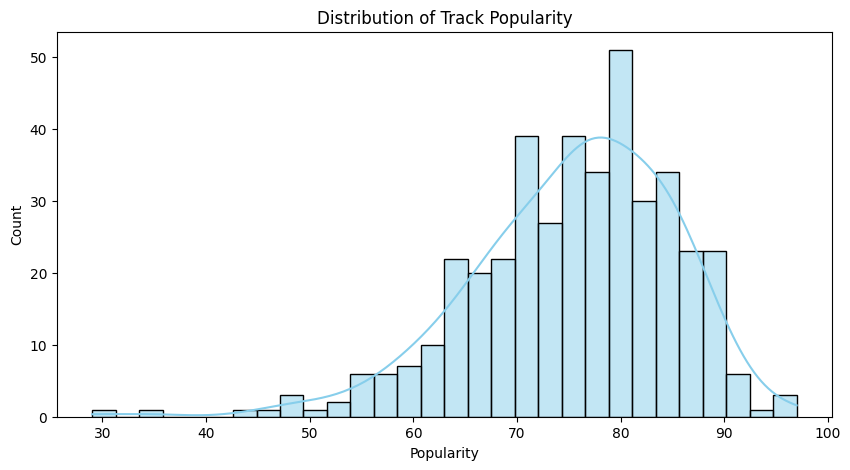

In [60]:

# 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
print("\n2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram")
plt.figure(figsize=(10,5))
sns.histplot(df['Popularity'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()



3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot


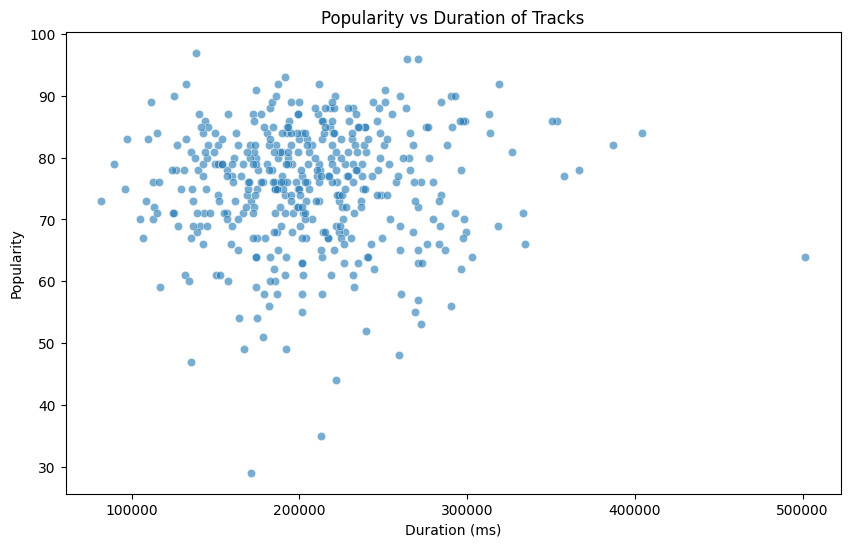

In [61]:
# 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
print("\n3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot")
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', alpha=0.6)
plt.title("Popularity vs Duration of Tracks")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()


4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot


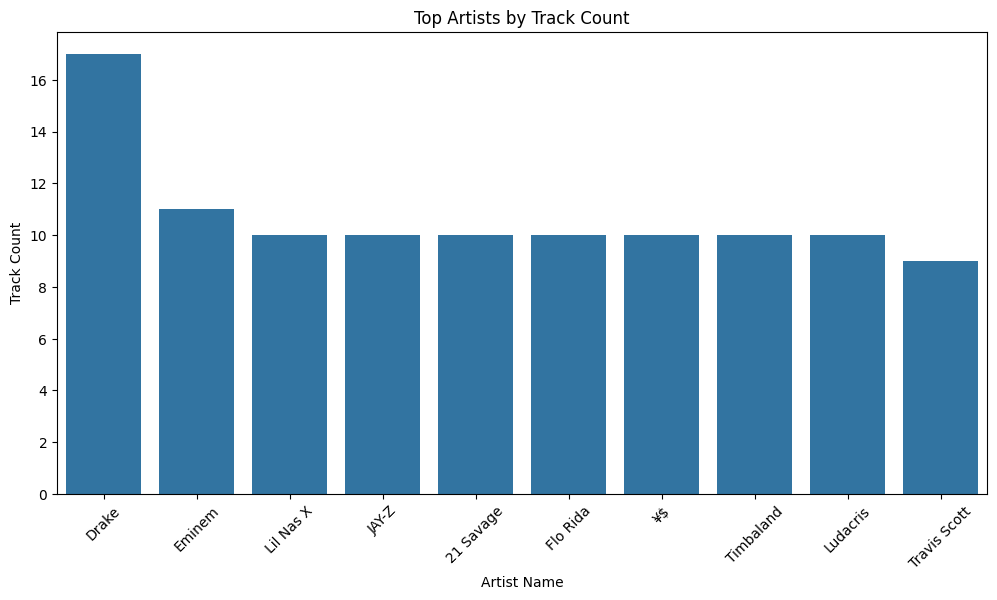

In [62]:
# 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
print("\n4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot")
plt.figure(figsize=(12,6))
top_artists = df['Artist'].value_counts().head(10)
sns.countplot(data=df[df['Artist'].isin(top_artists.index)], x='Artist', order=top_artists.index)
plt.xticks(rotation=45)
plt.title("Top Artists by Track Count")
plt.xlabel("Artist Name")
plt.ylabel("Track Count")
plt.show()

In [63]:
# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
print("\n5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each")
least_popular = df.sort_values(by='Popularity').head(5)
print(least_popular[['Artist', 'Track Name', 'Popularity']])


5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [64]:
# 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
print("\n6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist")
top_5_artists = df['Artist'].value_counts().head(5).index
avg_popularity = df[df['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print(avg_popularity)


6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


In [65]:
# 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
print("\n7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist")
most_popular_tracks = df[df['Artist'].isin(top_5_artists)].sort_values(by='Popularity', ascending=False)
for artist in top_5_artists:
    top_track = most_popular_tracks[most_popular_tracks['Artist'] == artist].iloc[0]
    print(f"{artist}: {top_track['Track Name']} (Popularity: {top_track['Popularity']})")



7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
Drake: Rich Baby Daddy (feat. Sexyy Red & SZA) (Popularity: 92)
Eminem: Without Me (Popularity: 90)
Lil Nas X: THATS WHAT I WANT (Popularity: 81)
JAY-Z: Ni**as In Paris (Popularity: 86)
21 Savage: redrum (Popularity: 96)



8. Visualize relationships between multiple numerical variables simultaneously using a pair plot


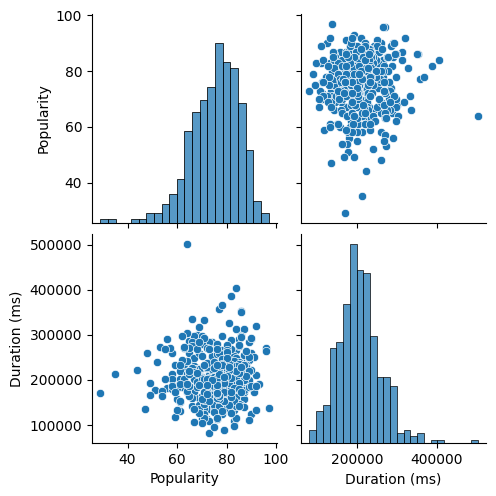

In [66]:
# 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot
print("\n8. Visualize relationships between multiple numerical variables simultaneously using a pair plot")
sns.pairplot(df[['Popularity', 'Duration (ms)']].dropna())
plt.show()


9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot


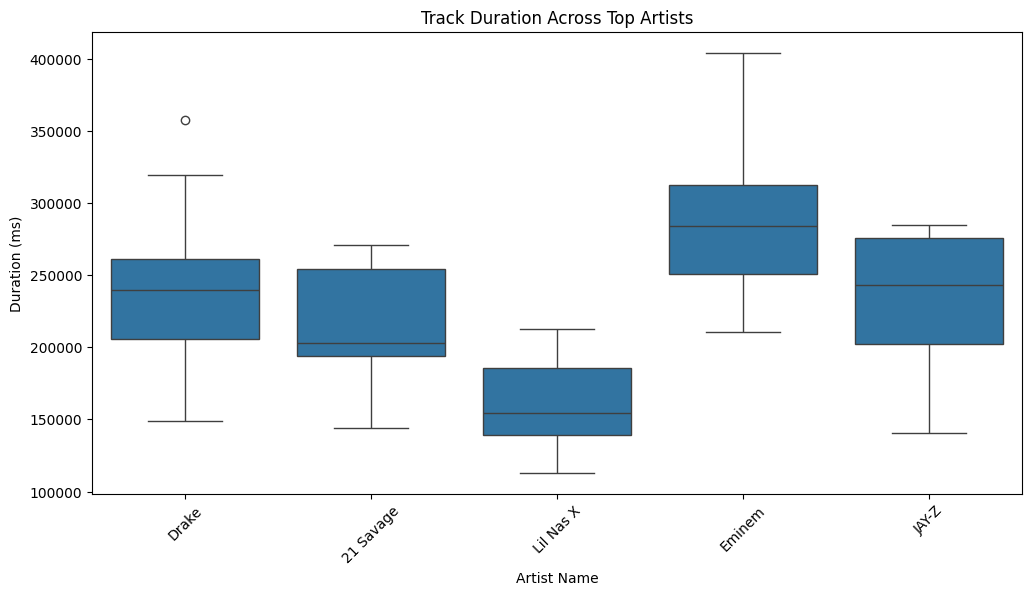

In [67]:
# 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
print("\n9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot")
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['Artist'].isin(top_5_artists)], x='Artist', y='Duration (ms)')
plt.xticks(rotation=45)
plt.title("Track Duration Across Top Artists")
plt.xlabel("Artist Name")
plt.ylabel("Duration (ms)")
plt.show()



10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot


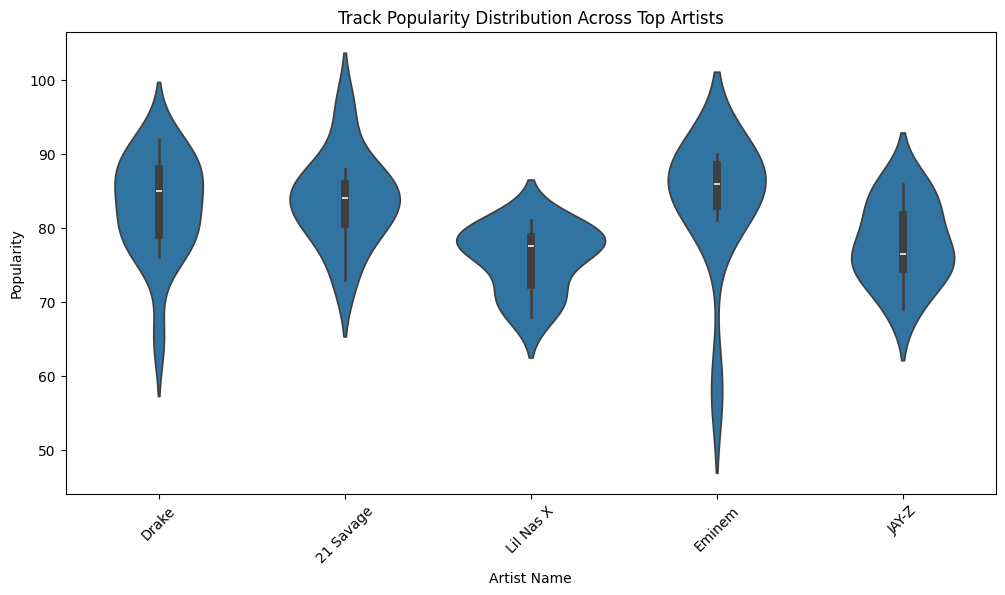

In [68]:
# 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot
print("\n10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot")
plt.figure(figsize=(12,6))
sns.violinplot(data=df[df['Artist'].isin(top_5_artists)], x='Artist', y='Popularity')
plt.xticks(rotation=45)
plt.title("Track Popularity Distribution Across Top Artists")
plt.xlabel("Artist Name")
plt.ylabel("Popularity")
plt.show()